In [ ]:
# AutoCat - simple simulator of a kinetics of autocatalytic reaction 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Data will be saved in .csv file in the folder of the code
FILE='Autocat_k1_k2-7'
NNAME=FILE+'.csv'
Header=['Times,s','CA','CB','vA']

In [3]:
# Initial concentration of A (in mol/L). Initial concentration CB0=0
CA0=1.

In [4]:
# Rate constants. k1 is 1st order constant, in s-1. k2 is 2nd order kinetics (mol-1.L.s-1)
k1=0.02  # A -> B  non-catalytic
k2=2    # A + B -> B + B  catalytic

In [5]:
# r_{f,i} = dC_i / dt

def dCA(t,CA,CB):
    return -k1*CA-k2*CA*CB

def dCB(t,CA,CB):
    return k1*CA+k2*CA*CB

In [6]:
t=0.
# tf=10.
dt=0.1

In [7]:
CA=CA0
CB=0
CA_fin=CA0*0.01  # Calculations are done until CA > CA_fin
vA=k1*CA+k2*CA*CB

In [8]:
t_out=np.array(t)
CA_out=np.array(CA)
CB_out=np.array(CB)
vA_out=np.array(vA)

In [9]:
while CA>CA_fin:
    CA_t=CA
    CB_t=CB
    CA=CA_t+dCA(t,CA_t,CB_t)*dt
    CB=CB_t+dCB(t,CA_t,CB_t)*dt
    vA=k1*CA+k2*CA*CB
    t=t+dt
    t_out=np.append(t_out,t)
    CA_out=np.append(CA_out,CA)
    CB_out=np.append(CB_out,CB)
    vA_out=np.append(vA_out,vA)

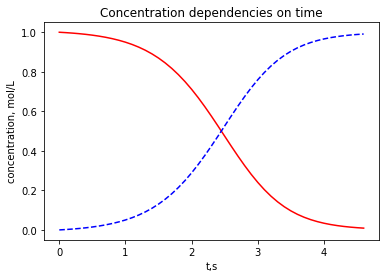

In [10]:
# Concentrations plots
plt.figure()
plt.title('Concentration dependencies on time')
plt.xlabel('t,s')
plt.ylabel('concentration, mol/L')
plt.plot(t_out,CA_out,'r-')
plt.plot(t_out,CB_out,'b--')

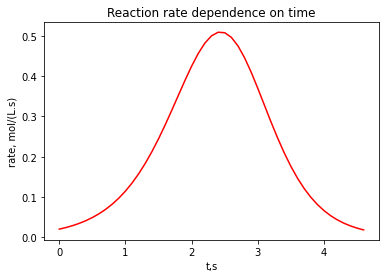

In [11]:
# rate plot
plt.figure
plt.title('Reaction rate dependence on time')
plt.xlabel('t,s')
plt.ylabel('rate, mol/(L.s)')
plt.plot(t_out,vA_out,'r-')

In [12]:
df={'time':t_out,'CA':CA_out,'CB':CB_out,'vA':vA_out}
df1=pd.DataFrame(data=df)

In [13]:
df1.to_csv(NNAME)